In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
features = np.loadtxt("features.dat")
names = np.loadtxt("features.dat", comments=None, max_rows=1, dtype=str)

In [7]:
names

array(['#Frame', 'RMS_M1_NMR', 'RMS_H9M1_NMR', 'RMS_M2_NMR',
       'RMS_H9M2_NMR', 'RMS_Heavy_NMR', 'RMS_Backbone_NMR',
       'RMS_Dimer_Int_NMR', 'RMS_Key_Int_NMR', 'RMS_M1_XTAL',
       'RMS_H9M1_XTAL', 'RMS_M2_XTAL', 'RMS_H9M2_XTAL', 'RMS_Heavy_XTAL',
       'RMS_Backbone_XTAL', 'RMS_Dimer_Int_XTAL', 'RMS_Key_Int_XTAL',
       'RMS_M1_HEX', 'RMS_H9M1_HEX', 'RMS_M2_HEX', 'RMS_H9M2_HEX',
       'RMS_Heavy_HEX', 'RMS_Backbone_HEX', 'RMS_Dimer_Int_HEX',
       'RMS_Key_Int_HEX', 'RMS_M1_PENT', 'RMS_H9M1_PENT', 'RMS_M2_PENT',
       'RMS_H9M2_PENT', 'RMS_Heavy_PENT', 'RMS_Backbone_PENT',
       'RMS_Dimer_Int_PENT', 'RMS_Key_Int_PENT', 'c2_angle',
       'helix_angle_3pt', 'o_angle_m1', 'o_angle_m2', 'RoG', 'RoG-cut',
       'Total_SASA', 'Num_Inter_Contacts[native]',
       'Num_Inter_Contacts[nonnative]', 'Num_Intra_Contacts[native]',
       'Num_Intra_Contacts[nonnative]', 'M1-E175-Oe_M2-W184-He1',
       'M2-E175-Oe_M1-W184-He1', 'M1-E175-Oe_M1-T148-HG1',
       'M2-E175-Oe_M2-T148

In [3]:
df = pd.DataFrame(features, columns=names)

In [4]:
def pdist(df, f1, f2):
    """
    Plot a pdist from the input df and feature names (f1 and f2).

    Parameters
    ----------
    df : dataframe
    f1 and f2: str
        Feature or column name
    """
    # get histogram
    counts, bins_x, bins_y = np.histogram2d(df[f1], df[f2], bins=100)
    # get bin midpoints
    midpoints_x = (bins_x[:-1] + bins_x[1:]) / 2
    midpoints_y = (bins_y[:-1] + bins_y[1:]) / 2
    # normalize counts (kT)
    counts = -np.log(counts/np.max(counts))

    # plot
    fig, ax = plt.subplots()
    plot = ax.pcolormesh(midpoints_x, midpoints_y, counts)
    cbar = plt.colorbar(plot)
    #ax.set(xlim=(0,70), ylim=(0,100))

/Users/darian/anaconda3/envs/md/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


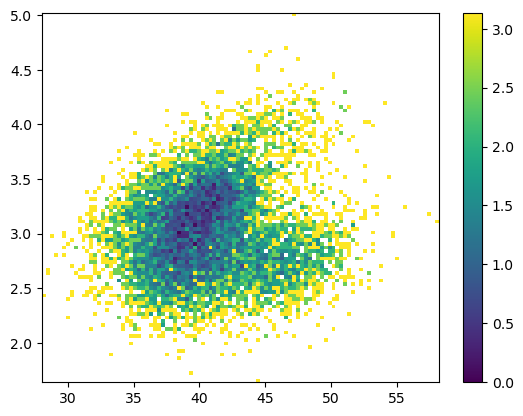

In [33]:
pdist(df, "o_angle_m1", "RMS_Backbone_PENT")

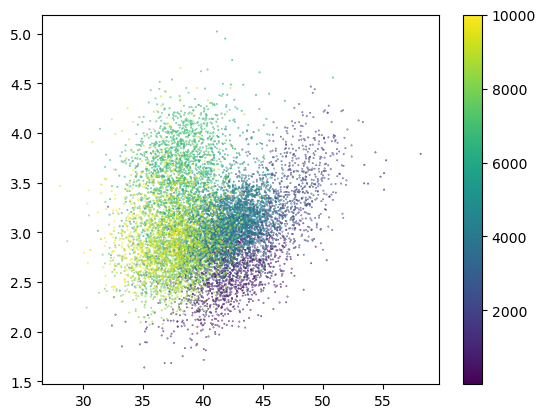

In [35]:
plt.scatter(df["o_angle_m1"], df["RMS_Backbone_PENT"], c=df["#Frame"], s=0.1)
plt.colorbar()

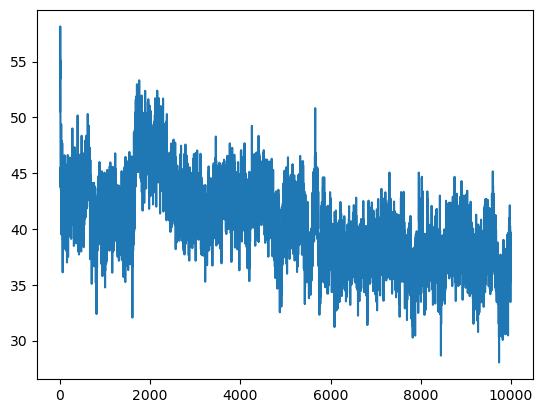

In [43]:
plt.plot(df["o_angle_m1"])

In [38]:
df["o_angle_m1"]

0       55.2680
1       50.5241
2       55.0963
3       54.8008
4       53.4390
         ...   
9995    37.3859
9996    39.3210
9997    36.3501
9998    38.1439
9999    37.4792
Name: o_angle_m1, Length: 10000, dtype: float64

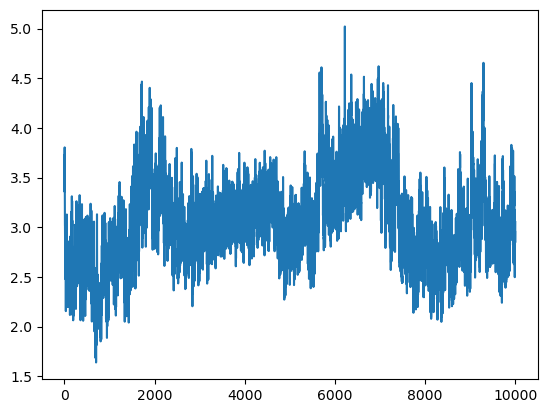

In [40]:
plt.plot(df["RMS_Backbone_PENT"])

In [39]:
df["RMS_Backbone_PENT"]

0       3.7247
1       3.3592
2       3.4293
3       3.5598
4       3.4931
         ...  
9995    2.8468
9996    2.8632
9997    3.0426
9998    2.9884
9999    3.0527
Name: RMS_Backbone_PENT, Length: 10000, dtype: float64

/Users/darian/anaconda3/envs/md/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


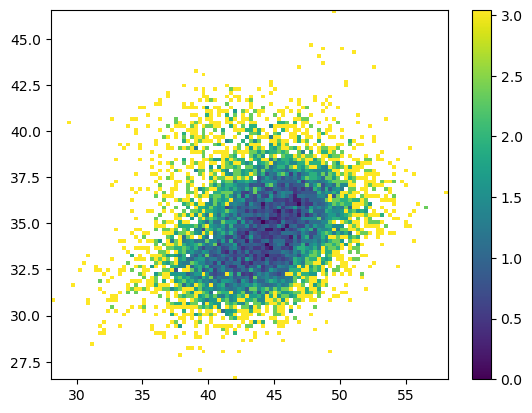

In [5]:
pdist(df, "o_angle_m1", "o_angle_m2")